# **Data Science for Business - Labor Market Analysis**

The aim of this project is to analyse, by means of data science techniques, the labor market for citizen of Lombardia, Italia.
In particular in this notebook we will see:
<ul>
    <li>Data Collecting - Retrive data from web sources</li>
    <li>Data Cleaning</li>
    <li>Statistics</li>
    <li>Anticipation of the labor market, where new job opportunitites will be created</li>
    <li>...</li>
    <li>...</li>
    <li>How SARS-CoV-2 epidemic affect the labor market</li>
</ul>

Let's import all needed library

In [2]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import requests
from os.path import exists
from datetime import datetime

In [3]:
%matplotlib inline

# Data Collecting - Retrive data from web sources

First of all let's retrive the two datasets selected for the analysis from the site of Regione Lombardia

In [4]:
if not exists('Rapporti_di_lavoro_attivati.csv'):
    r = requests.get("https://dati.lombardia.it/api/views/qbau-cyuc/rows.csv?accessType=DOWNLOAD", allow_redirects=True)
    open('Rapporti_di_lavoro_attivati.csv', 'wb').write(r.content)

if not exists('Rapporti_di_lavoro_cessati.csv'):
    r = requests.get("https://dati.lombardia.it/api/views/nwz3-p6vm/rows.csv?accessType=DOWNLOAD", allow_redirects=True)
    open('Rapporti_di_lavoro_cessati.csv', 'wb').write(r.content) 

Load CSV file into Panda DataFrame

In [5]:
df_att = pd.read_csv('Rapporti_di_lavoro_attivati.csv')
df_att

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,09/05/2020,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA
1,12/07/2019,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,05/06/2013,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/03/2010,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA
4,06/04/2021,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA
...,...,...,...,...,...,...,...,...,...
9579789,01/03/2020,M,52,Lavori di meccanica generale,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
9579790,06/09/2010,M,61,Lavori di meccanica generale,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ALBANIA
9579791,06/11/2021,M,37,Fabbricazione di parti ed accessori per bicicl...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,SENEGAL
9579792,02/02/2010,M,35,Fabbricazione di parti ed accessori per bicicl...,LICENZA MEDIA,LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIO...,TEMPO PIENO,BERGAMO,SENEGAL


In [6]:
df_ces = pd.read_csv('Rapporti_di_lavoro_cessati.csv')
df_ces

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,02/04/2019,M,20,Lavori di meccanica generale,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
1,08/06/2018,F,28,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
2,02/02/2016,F,20,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/01/2015,M,59,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
4,09/08/2017,M,61,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
...,...,...,...,...,...,...,...,...,...
3741389,05/11/2018,M,19,Fabbricazione di altri elementi in legno e di ...,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIA
3741390,09/04/2017,M,67,Altra istruzione secondaria di secondo grado d...,LAUREA - Vecchio o nuovo ordinamento,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BRESCIA,ITALIA
3741391,08/05/2015,M,59,Costruzione di edifici residenziali e non resi...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,MAROCCO
3741392,10/10/2016,M,26,Installazione di altre macchine ed apparecchia...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA


# Data Cleaning
Let's drop null values from datasets

In [7]:
df_att.dropna(axis=0, how='any', inplace=True)
df_ces.dropna(axis=0, how='any', inplace=True)

Drop the column named "ITALIANO", not useful for this type for next analysis

In [8]:
df_att.drop("ITALIANO", axis=1, inplace=True)
df_ces.drop("ITALIANO", axis=1, inplace=True)

Convert the colunm <code>"DATE"</code> in a date Python object

In [9]:
df_att['DATA'] = pd.to_datetime(df_att['DATA'], format="%d/%m/%Y", errors='coerce')

# remove NaT values, date that coudn't be converted from string to Python date object
df_att.dropna(axis=0, how='any', inplace=True)

df_att.groupby("DATA")["DATA"].count()

DATA
1973-01-02       1
1974-06-11       1
1976-10-01       1
1978-05-01       1
1978-07-10       1
              ... 
2021-12-06    1097
2021-12-07    6872
2021-12-08    4960
2021-12-09     601
2201-09-06       1
Name: DATA, Length: 2001, dtype: int64

In [10]:
df_ces["DATA"] = pd.to_datetime(df_ces["DATA"], format="%d/%m/%Y", errors='coerce')

# remove NaT values, date that coudn't be converted from string to Python date object
df_ces.dropna(axis=0, how='any', inplace=True)

df_ces.groupby("DATA")["DATA"].count()

DATA
1988-01-05       1
1988-12-07       1
1989-10-04       1
1990-06-04       1
1992-09-04       1
              ... 
2021-12-05    2247
2021-12-06     168
2021-12-07    2970
2021-12-08    1303
2021-12-09     115
Name: DATA, Length: 2322, dtype: int64

As you can see there is data with date in the future, this is a mistake in the dataset, i am going to remove all tuple with date >= today

In [11]:
today = datetime.today().strftime('%Y-%m-%d')
df_att = df_att.loc[(df_att["DATA"] < today)]
df_ces = df_ces.loc[(df_ces["DATA"] < today)]

<AxesSubplot:>

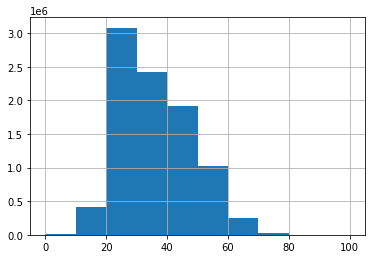

In [12]:
df_att["ETA"].hist()

<AxesSubplot:>

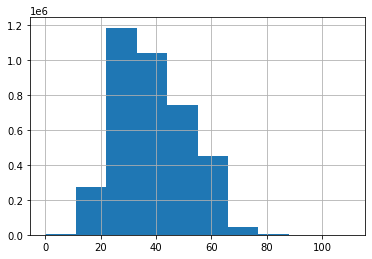

In [13]:
df_ces["ETA"].hist()

As we can see there entry that presente an age < 16, is illegal to work in italy until 16 years old, moreover the retirement age in italy is about 67 years old so we can delete all entries with age < 16 and age > 67 that are probablz in error in the dataset.

In [14]:
df_att.loc[(df_att["ETA"] < 16) | (df_att["ETA"] > 67)]

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA
546,2019-12-07,M,95,Attività di organizzazioni che perseguono fini...,LAUREA - Vecchio o nuovo ordinamento,LAVORO AUTONOMO NELLO SPETTACOLO,NON DEFINITO,LECCO
964,2013-08-04,M,68,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PARZIALE ORIZZONTALE,LECCO
1480,2020-05-02,M,68,Coltivazioni agricole associate all'allevament...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,LODI
1521,2019-08-08,M,70,"Coltivazioni miste di cereali, legumi da grane...",NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MANTOVA
1574,2020-12-02,M,71,Coltivazione di cereali (escluso il riso),LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MANTOVA
...,...,...,...,...,...,...,...,...
9578758,2020-12-11,F,10,Programmazione e trasmissioni televisive,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO AUTONOMO NELLO SPETTACOLO,NON DEFINITO,MILANO
9578816,2016-01-08,M,69,Riproduzione di supporti registrati,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO AUTONOMO NELLO SPETTACOLO,NON DEFINITO,MILANO
9578891,2010-01-04,M,68,Costruzione di edifici residenziali e non resi...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA
9579417,2018-10-07,F,73,Legatoria e servizi connessi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,CREMONA


In [15]:
df_ces.loc[(df_ces["ETA"] < 16) | (df_ces["ETA"] > 67)]

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA
88,2018-11-12,M,70,Trasporto aereo non di linea di passeggeri; vo...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,LECCO
159,2017-02-11,F,73,Altre strutture di assistenza sociale residenz...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,LECCO
234,2010-09-12,F,69,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,LECCO
413,2012-01-06,M,69,Installazione di impianti elettrici in edifici...,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,ASSOCIAZIONE IN PARTECIPAZIONE A TEMPO DETERMI...,TEMPO PIENO,LECCO
505,2010-04-01,M,69,Costruzione di edifici residenziali e non resi...,LICENZA MEDIA,LAVORO OCCASIONALE,NON DEFINITO,LECCO
...,...,...,...,...,...,...,...,...
3740795,2019-04-11,M,75,Ristorazione con somministrazione,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,PAVIA
3740820,2016-01-09,M,76,Attività di supporto alla produzione vegetale,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,PAVIA
3740960,2009-06-07,M,68,Costruzione di edifici residenziali e non resi...,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,LAVORO INTERMITTENTE A TEMPO INDETERMINATO,TEMPO PIENO,BRESCIA
3741262,2011-01-06,M,70,Commercio al dettaglio di carburante per autot...,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,LAVORO A PROGETTO / COLLABORAZIONE COORDINATA ...,NON DEFINITO,BERGAMO


In [16]:
df_att = df_att.loc[(df_att["ETA"] >= 16) & (df_att["ETA"] <= 67)]
df_ces = df_ces.loc[(df_ces["ETA"] >= 16) & (df_ces["ETA"] <= 67)]

# Data Sampling
In this analysisi only data from 2010 to 2021 is taken in account, so let's remove data outside this intervall and then take 100000 samples

In [17]:
from_date = "2010-01-01"
to_date = "2021-12-31"
df_att = df_att.loc[(df_att["DATA"]>=from_date) & (df_att["DATA"]<=to_date)]
df_ces = df_ces.loc[(df_ces["DATA"]>=from_date) & (df_ces["DATA"]<=to_date)]

Let's take 100000 samples from each dataset

In [18]:
# take 100000 samples from the datasets
df_att = df_att.sample(n=100000,replace=False)
df_ces = df_ces.sample(n=100000, replace=False)

# Statistics

Let's start calculating some statstics metrics for numerical columns, in this case only the age column <code>"ETA"</code>

In [19]:
print("Activated Contracts dataset")
df_att.describe()

Activated Contracts dataset


,ETA
count,100000.000000
mean,35.308430
std,11.570092
min,16.000000
25%,26.000000
50%,34.000000
75%,44.000000
max,67.000000


In [20]:
print("Terminated Contracts dataset")
df_ces.describe()

Terminated Contracts dataset


,ETA
count,100000.000000
mean,38.066080
std,12.323829
min,16.000000
25%,28.000000
50%,37.000000
75%,47.000000
max,67.000000


## Frquency Analysis
**Gender distribution**

Text(0.5, 1.0, 'Gender Distribution for Terminated Contract')

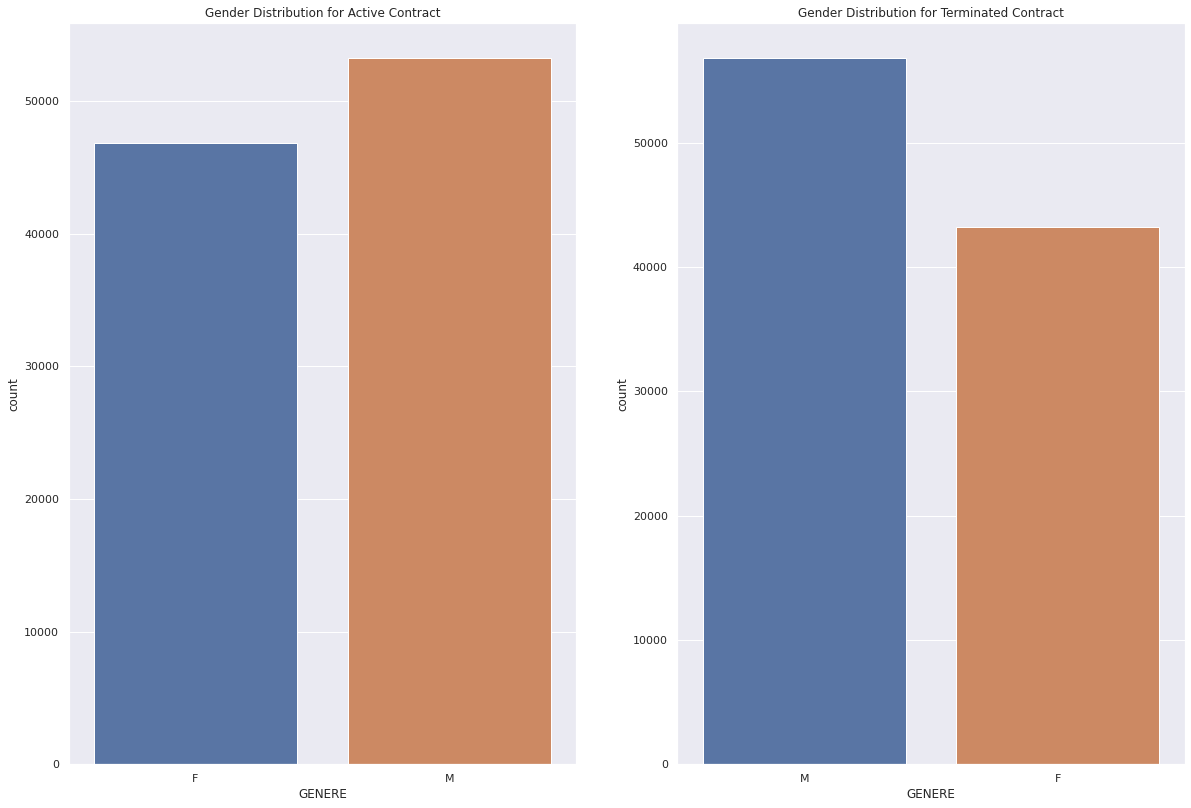

In [21]:
sns.set(rc={"figure.figsize": (20, 30)})
plt.subplot(2, 2, 1)
count_att = sns.countplot(x="GENERE", data=df_att)
count_att.set_title("Gender Distribution for Active Contract")
plt.subplot(2, 2, 2)
count_ces = sns.countplot(x="GENERE", data=df_ces)
count_ces.set_title("Gender Distribution for Terminated Contract")

**Age distribution**
Now let's plot the age distribution in the 2 datasets

Text(0.5, 1.0, 'Age distribution on Terminated Contracts dataset')

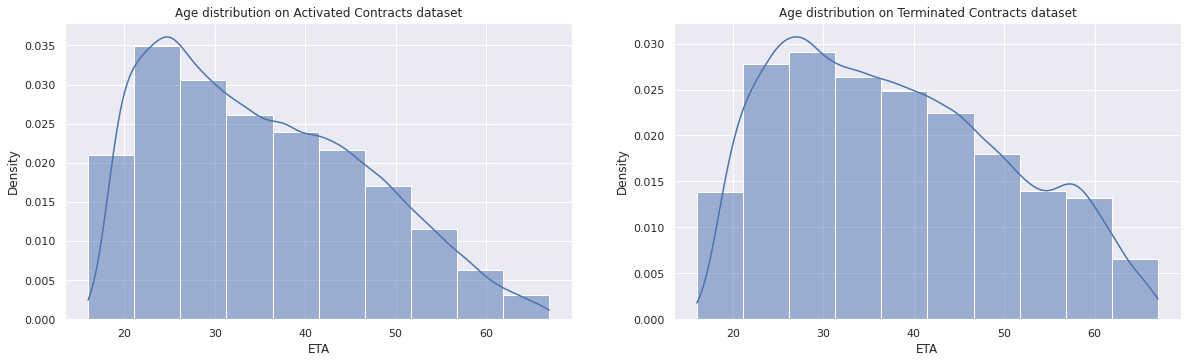

In [22]:
sns.set(rc={"figure.figsize": (20, 12)})
plt.subplot(2,2,1)
sns.histplot(df_att.ETA, label="AGE'", stat="density", bins=10, kde=True).set_title("Age distribution on Activated Contracts dataset")
plt.subplot(2,2,2)
sns.histplot(df_ces.ETA, label="AGE'", stat="density", bins=10, kde=True).set_title("Age distribution on Terminated Contracts dataset")

**Top frequent activated and terminated contract**

In [23]:
freq_settore_att = df_att.groupby("SETTOREECONOMICODETTAGLIO")["SETTOREECONOMICODETTAGLIO"].count()
freq_settore_att.sort_values(ascending=False, inplace=True)
freq_settore_att = freq_settore_att.head(10)
df_top_set_att = freq_settore_att.to_frame()

df_top_set_att.rename(columns={df_top_set_att.columns[0]:"FREQUENCY"}, inplace=True)
df_top_set_att.reset_index(inplace=True)
df_top_set_att.rename(columns={df_top_set_att.columns[0]:"BUSINESS"}, inplace=True)



freq_settore_ces = df_ces.groupby("SETTOREECONOMICODETTAGLIO")["SETTOREECONOMICODETTAGLIO"].count()
freq_settore_ces.sort_values(ascending=False, inplace=True)
freq_settore_ces = freq_settore_ces.head(10)
df_top_set_ces = freq_settore_ces.to_frame()

df_top_set_ces.rename(columns={df_top_set_ces.columns[0]:"FREQUENCY"}, inplace=True)
df_top_set_ces.reset_index(inplace=True)
df_top_set_ces.rename(columns={df_top_set_ces.columns[0]:"BUSINESS"}, inplace=True)

Top Frequency of Activated Contract per business


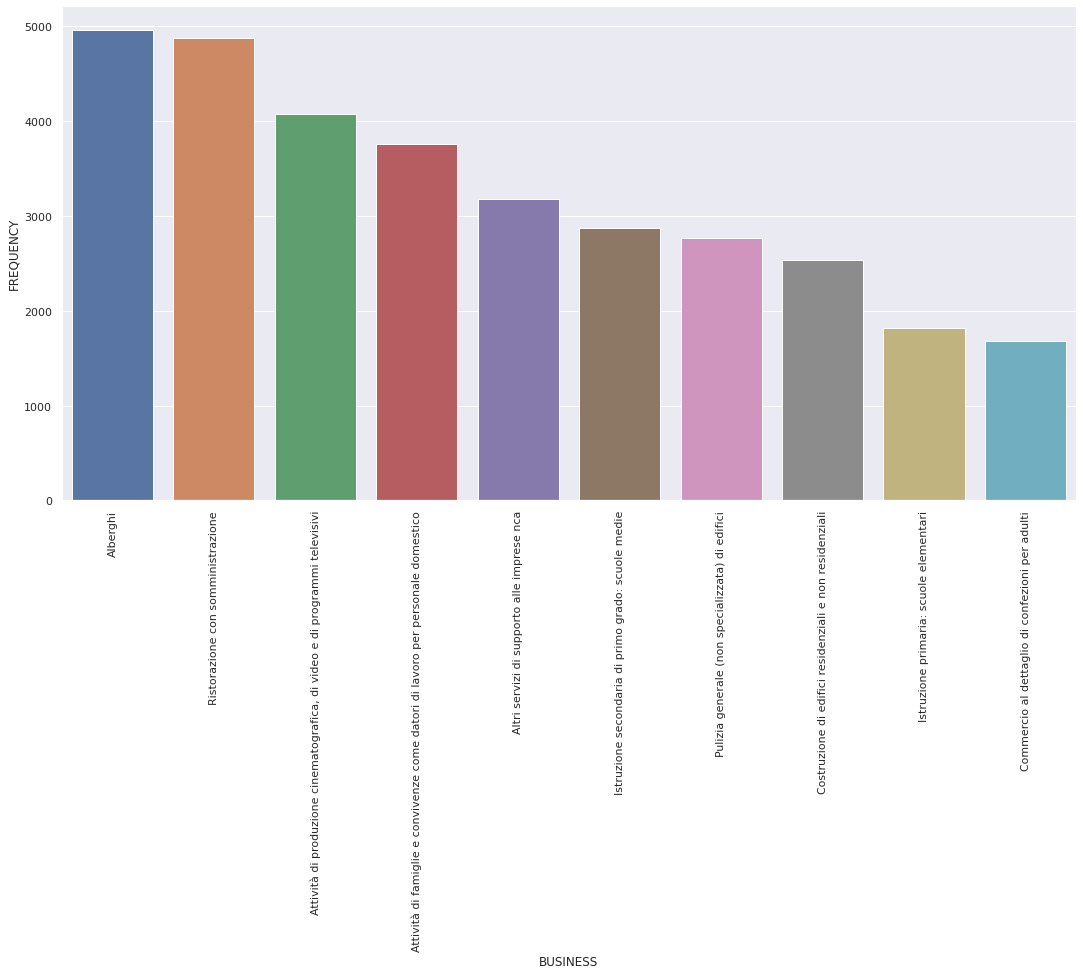

In [24]:
sns.set(rc={"figure.figsize": (40, 20)})
plt.subplot(2, 2, 1)
barplot = sns.barplot(x="BUSINESS", y="FREQUENCY", data=df_top_set_att)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
print("Top Frequency of Activated Contract per business")


Top Frequency of Terminated Contract per business


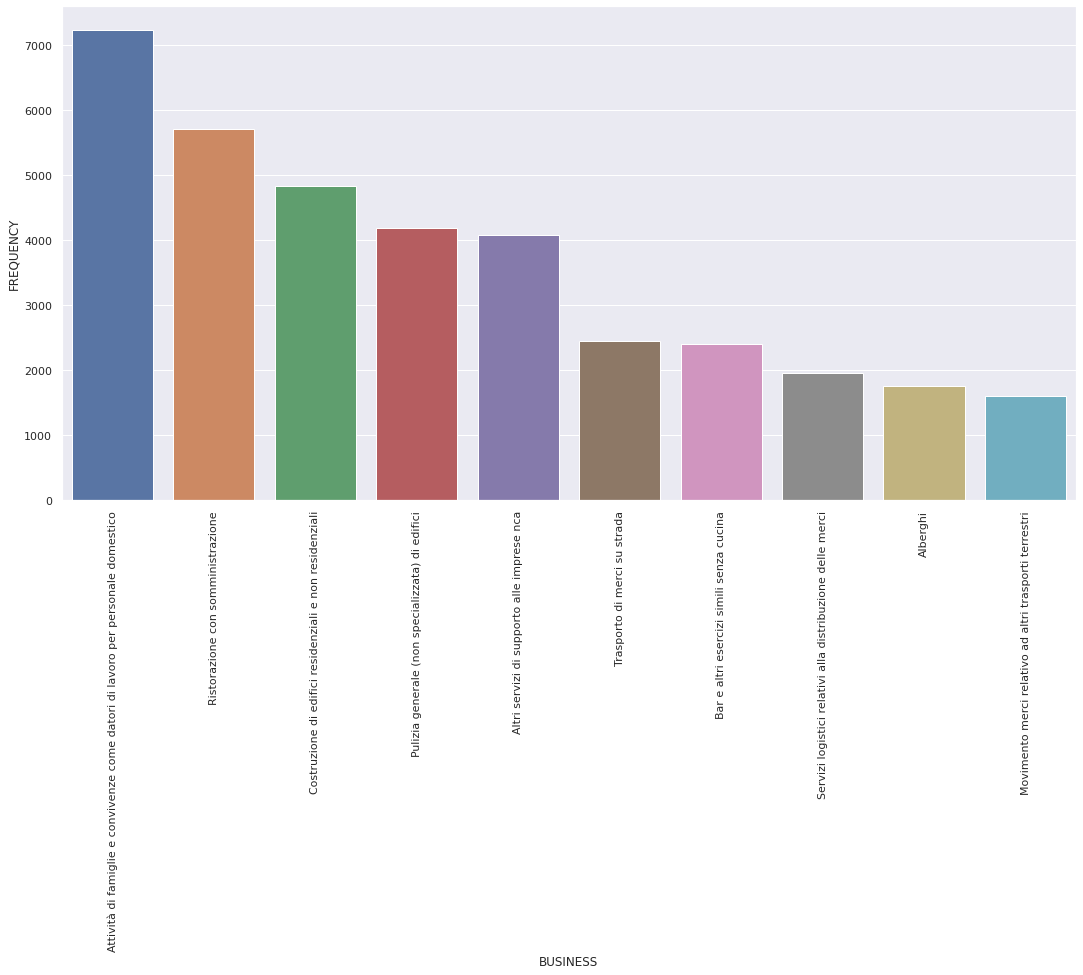

In [25]:
sns.set(rc={"figure.figsize": (40, 20)})
plt.subplot(2, 2, 1)
barplot = sns.barplot(x="BUSINESS", y="FREQUENCY", data=df_top_set_ces)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
print("Top Frequency of Terminated Contract per business")

**Geographic Distribution**

In [ ]:
sns.set(rc={"figure.figsize": (20, 30)})
plt.subplot(2, 2, 1)
count_att = sns.countplot(x="PROVINCIAIMPRESA", data=df_att)
count_att.set_title("Gender Distribution for Active Contract")
count_att.set_xticklabels(count_att.get_xticklabels(), rotation=70)

plt.subplot(2, 2, 2)
count_ces = sns.countplot(x="PROVINCIAIMPRESA", data=df_ces)
count_ces.set_title("Gender Distribution for Terminated Contract")
count_ces.set_xticklabels(count_ces.get_xticklabels(), rotation=70)
print("Geographic Distribution")

## Correlation

/root/anaconda3/envs/dsfb/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/root/anaconda3/envs/dsfb/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/root/anaconda3/envs/dsfb/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

<AxesSubplot:xlabel='ETA', ylabel='Density'>

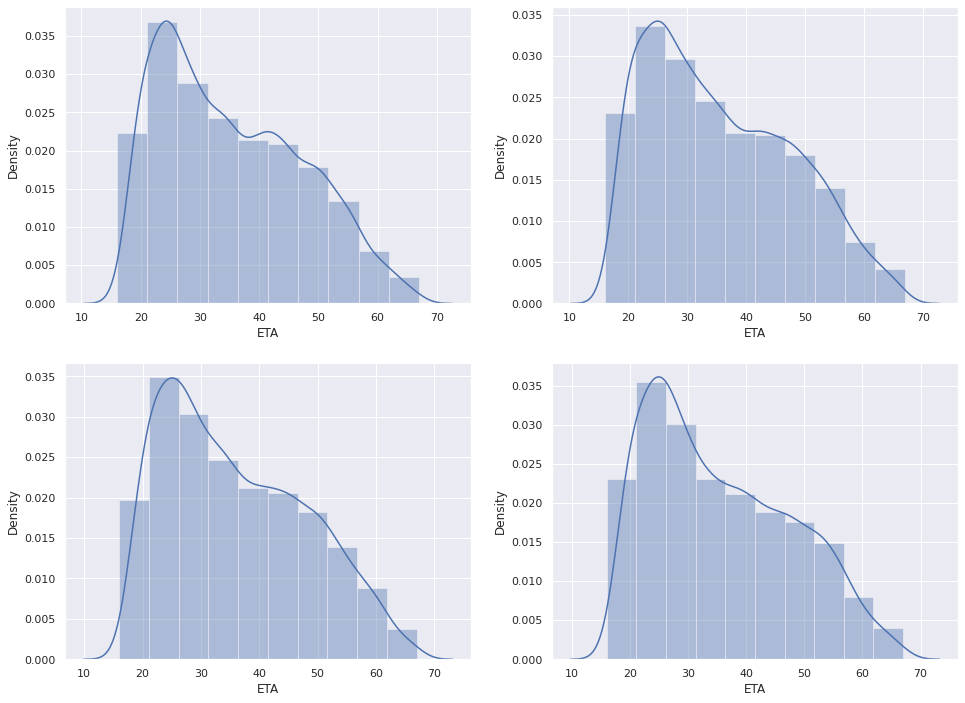

In [21]:
#from pylab import *

sns.set(rc={"figure.figsize": (16, 12)});

# convert the 'Date' column to datetime format
df_att['DATA']= pd.to_datetime(df_att['DATA'])
df_att_2018 = df_att[(df_att['DATA'] > '2018-01-01') & (df_att['DATA'] < '2018-12-31')]
df_att_2018.GENERE.value_counts()
# Distribuzione sample contratti attivati per età
plt.subplot(2,2,1)
sns.distplot(df_att_2018.ETA, bins=10)

# convert the 'Date' column to datetime format
df_att['DATA']= pd.to_datetime(df_att['DATA'])
df_att_2019 = df_att[(df_att['DATA'] > '2019-01-01') & (df_att['DATA'] < '2019-12-31')]
df_att_2019.GENERE.value_counts()
# Distribuzione sample contratti attivati per età
plt.subplot(2,2,2)
sns.distplot(df_att_2019.ETA, bins=10)

# convert the 'Date' column to datetime format
df_att['DATA']= pd.to_datetime(df_att['DATA'])
df_att_2020 = df_att[(df_att['DATA'] > '2020-01-01') & (df_att['DATA'] < '2020-12-31')]
df_att_2020.GENERE.value_counts()
# Distribuzione sample contratti attivati per età
plt.subplot(2,2,3)
sns.distplot(df_att_2020.ETA, bins=10)

# convert the 'Date' column to datetime format
df_att['DATA']= pd.to_datetime(df_att['DATA'])
df_att_2021 = df_att[(df_att['DATA'] > '2021-01-01') & (df_att['DATA'] < '2021-12-31')]
df_att_2021.GENERE.value_counts()
# Distribuzione sample contratti attivati per età
plt.subplot(2,2,4)
sns.distplot(df_att_2021.ETA, bins=10)

NameError: name 'sns' is not defined

In [9]:
# take 100000 samples from the datasets
df_att_sample = df_att.sample(n=100000)
df_ces_sample = df_att.sample(n=100000)

In [32]:
df_att_sample.GENERE.value_counts()

M    53223
F    46777
Name: GENERE, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd2441e7be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd2441ca040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd243ebd6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd2441ca4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd2441ca7c0>],
 'means': []}

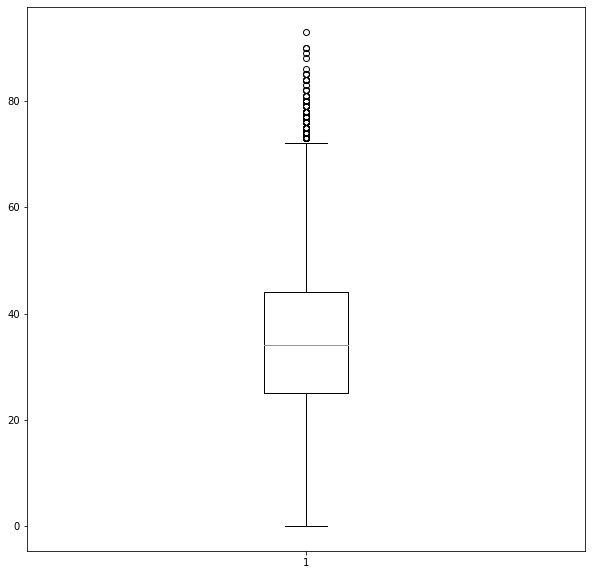

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot(df_att_sample.ETA)

/root/anaconda3/envs/dsfb/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


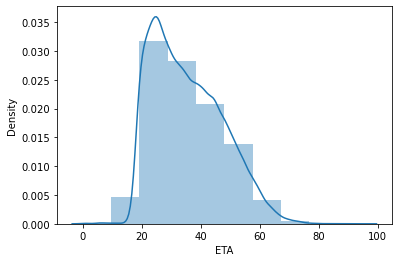

In [24]:
# Distribuzione sample attività avviate per età
dist_att = sns.distplot(df_att_sample.ETA, bins=10)

/root/anaconda3/envs/dsfb/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


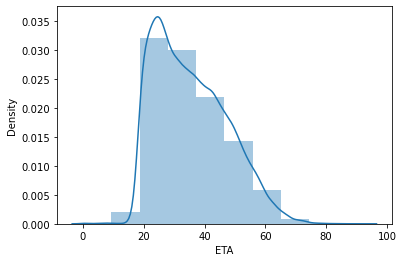

In [25]:
# Distribuzione sample attività cessate per età
dist_ces = sns.distplot(df_ces_sample.ETA, bins=10)

In [43]:
mean_age_att = df_att_sample["ETA"].mean()
mean_age_ces = df_ces_sample["ETA"].mean()
mean_age_f_att = df_att_sample["ETA"].mean()
print(f'Media Età - Contratti Attivati {mean_age_att}')

print(f'Media Età - Contratti Cessati {mean_age_ces}')

Media Età - Contratti Attivati 35.45674
Media Età - Contratti Cessati 35.47624


In [ ]:
df_att_sample[""]